In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
path = r'data'
dirs = np.array([[(os.path.join(dp, f), 
                   pydicom.dcmread(os.path.join(dp, f), stop_before_pixels=True)) 
                  for f in files] 
                 for dp,_,files in os.walk(path) if len(files) != 0])

In [3]:
len(dirs)

1

In [4]:
instances = dirs[0]
len(instances)

864

In [5]:
series_uids = np.unique([inst[1].SeriesInstanceUID for inst in instances])
len(series_uids)

32

In [6]:
studies_uids = np.unique([inst[1].StudyInstanceUID for inst in instances])
len(studies_uids)

10

In [7]:
patient_ids = [inst[1].PatientID for inst in instances]
print(patient_ids)

['123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456',

In [8]:
patients_ids_uq = np.unique(patient_ids)
print(f'Number of patients: {len(patients_ids_uq)}, patient IDs: {patients_ids_uq}')

Number of patients: 6, patient IDs: ['123456' 'OPA135179' 'PGBM-003' 'PGBM-004' 'PGBM-005' 'PGBM-009']


In [9]:
series_uids_modality_map = {uid: s[1].Modality for uid in series_uids for s in instances if s[1].SeriesInstanceUID == uid}

In [10]:
series_uids_modality_map

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': 'CT',
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.

In [11]:
slices_ct = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == '1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286']
slices_mr1 = [pydicom.dcmread(inst[0]) for inst in instances \
              if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[4][0]]
slices_mr2 = [pydicom.dcmread(inst[0]) for inst in instances \
              if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[9][0]]

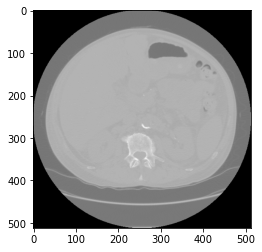

In [12]:
plt.imshow(slices_ct[10].pixel_array, cmap='gray')

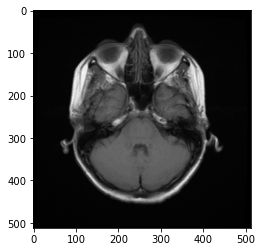

In [13]:
plt.imshow(slices_mr1[10].pixel_array, cmap='gray')

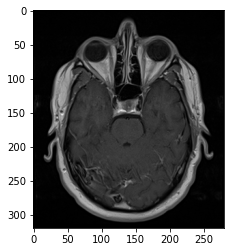

In [14]:
plt.imshow(slices_mr2[10].pixel_array, cmap='gray')

In [15]:
study_dates = sorted(np.unique([inst[1].StudyDate for inst in instances]))
study_dates

['19880512',
 '19910103',
 '19910702',
 '19920505',
 '19930622',
 '19940112',
 '19950329',
 '19951017',
 '20150116',
 '20190101']

In [16]:
print(np.unique([inst[1].StudyDate for inst in instances if inst[1].Modality == 'CT']))

['20190101']


In [17]:
slices_odd_mr = [pydicom.dcmread(inst[0]) for inst in instances \
                if inst[1].StudyDate == '20150116']

In [18]:
print(np.unique([s.SeriesInstanceUID for s in slices_odd_mr]))
print(len(slices_odd_mr))

['1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0']
36


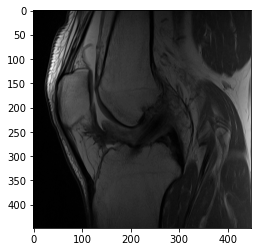

In [19]:
plt.imshow(slices_odd_mr[15].pixel_array, cmap='gray')

In [20]:
volumes = dict()

for inst in instances:
    sid = inst[1].SeriesInstanceUID
    if (sid not in volumes):
        volumes[sid] = dict()
        
    volumes[sid]['StudyDate'] = inst[1].StudyDate
    volumes[sid]['Width'] = inst[1].Columns
    volumes[sid]['Height'] = inst[1].Rows
    volumes[sid]['PatientId'] = inst[1].PatientID
    
    if ('slice_count' not in volumes[sid]):
        volumes[sid]['slice_count'] = 0
    else:
        volumes[sid]['slice_count'] += 1

In [21]:
volumes

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': {'StudyDate': '20190101',
  'Width': 512,
  'Height': 512,
  'PatientId': '123456',
  'slice_count': 138},
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': {'StudyDate': '20150116',
  'Width': 448,
  'Height': 448,
  'PatientId': 'OPA135179',
  'slice_count': 35},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.250698293053013179878447218670': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': {'StudyDate': '19950329',
  'Width': 280,
  'Height'

In [22]:
for _,v in volumes.items():
    print(f"{v['Width']}x{v['Height']}x{v['slice_count']} ")

512x512x138 
448x448x35 
280x320x21 
280x320x21 
280x320x21 
280x320x21 
512x512x23 
512x512x23 
512x512x23 
512x512x23 
512x512x22 
512x512x22 
512x512x22 
512x512x22 
512x512x21 
512x512x21 
512x512x21 
512x512x21 
280x320x21 
280x320x21 
280x320x21 
280x320x21 
260x320x23 
260x320x23 
260x320x23 
260x320x23 
260x320x24 
260x320x24 
260x320x24 
512x512x21 
512x512x21 
512x512x21 
